<h1> 시간별 제주 전력수요량 EDA</h1>

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
from datetime import datetime
import calendar
%matplotlib inline
import seaborn as sns

df = pd.read_csv('C:/Users/WIN10/Downloads/energy.csv', encoding='cp949')
cols = ['date', 'h1', 'h2', 'h3','h4' ,'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15','h16'
       , 'h17', 'h18', 'h19', 'h20', 'h21', 'h22','h23','h24']
df.columns = cols
df.head()

,date,h1,h2,h3,h4,h5,h6,h7,h8,h9,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
0,2007-01-01,422.037,398.037,380.637,368.775,370.051,372.159,374.676,361.026,341.567,...,336.214,343.124,350.981,375.544,394.203,394.240,388.124,387.212,413.658,422.529
1,2007-01-02,397.819,374.159,358.701,348.422,348.996,362.357,369.187,372.940,382.285,...,382.423,382.390,386.971,413.192,439.721,432.768,425.605,416.936,435.161,438.139
2,2007-01-03,410.473,385.102,368.481,358.802,360.899,369.266,378.414,382.822,387.433,...,394.064,395.911,404.583,426.010,438.461,432.950,421.157,407.550,430.667,434.811
3,2007-01-04,406.087,380.251,364.197,355.552,358.710,366.111,374.988,379.917,382.947,...,386.480,385.895,387.390,413.372,433.645,428.572,417.667,410.505,431.918,436.340
4,2007-01-05,408.738,384.298,365.598,355.323,357.527,367.703,376.722,377.281,385.651,...,390.343,386.563,387.705,408.761,433.896,427.326,419.900,411.197,432.102,436.708


<h2> (1) 결측 값 여부 확인</h2>

In [78]:
df.isnull().sum()

date    0
h1      0
h2      0
h3      0
h4      0
h5      0
h6      0
h7      0
h8      0
h9      0
h10     0
h11     0
h12     0
h13     0
h14     0
h15     0
h16     0
h17     0
h18     0
h19     0
h20     0
h21     0
h22     0
h23     0
h24     0
dtype: int64

<h2> (2) 상관관계 히트맵 </h2>

(5479, 25)

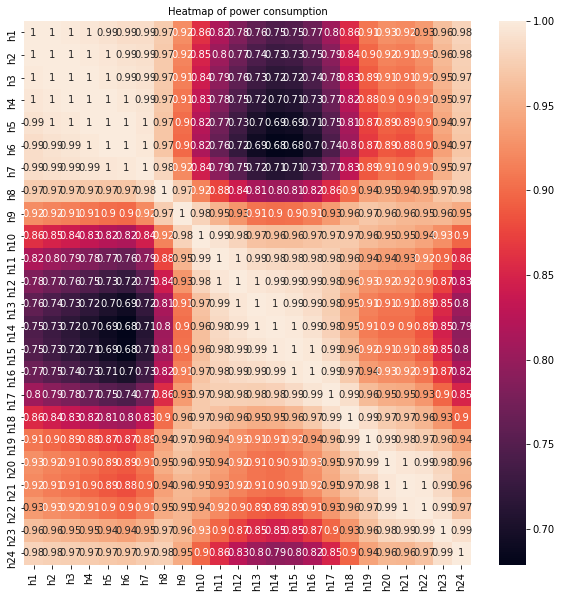

In [81]:
corrMat = df[['h1', 'h2', 'h3','h4' ,'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15','h16'
       , 'h17', 'h18', 'h19', 'h20', 'h21', 'h22','h23','h24']].corr() 
fig, ax= plt.subplots() 
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True) # 상관관계 히트맵 그리기
ax.set(title='Heatmap of power consumption');
df.shape #row와 column의 개수
#1.0에 가까울 수록 유사( h1 ~ h7, h19 ~ h24 : 비활동 시간, h10 ~ h18 : 활동 시간)

<h2> (3) 월별 평균, 중앙값, 최댓값, 최솟값 집계 </h2>

In [82]:
df['year'] = df['date'].apply(lambda x:x.split()[0].split('-')[0])
df['month'] = df['date'].apply(lambda x:x.split()[0].split('-')[1])
df['day'] = df['date'].apply(lambda x:x.split()[0].split('-')[2])
df['weekday']=df['date'].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

In [84]:
#월별 평균, 중앙값, 최댓값, 최솟값 집계
df.groupby(["month"])['h3'].agg([np.mean, np.median, np.max, np.min]) #비활동시간

,mean,median,amax,amin
month,,,,
01,548.329725,541.4830,764.325,358.701
02,541.841939,542.5415,781.552,348.952
03,515.514989,510.8550,718.458,324.417
04,476.352969,477.9265,708.889,309.900
05,420.070634,420.7610,611.866,288.674
06,404.575047,397.7850,553.538,284.875
07,443.924232,426.5980,638.902,296.273
08,466.002075,441.7800,643.070,282.602
09,412.100629,400.2845,603.058,251.146


In [85]:
df.groupby(["month"])['h16'].agg([np.mean, np.median, np.max, np.min]) # 활동시간

,mean,median,amax,amin
month,,,,
01,567.435378,555.9480,932.032,338.056
02,545.793804,547.4395,864.140,279.696
03,510.356024,506.1800,807.926,332.882
04,482.694144,486.0800,721.525,326.760
05,479.160161,471.4920,718.306,330.195
06,515.896636,506.8840,770.446,325.881
07,622.165946,601.8010,921.348,349.467
08,660.102538,619.6320,989.450,399.216
09,547.562424,535.4970,917.707,110.117


<h2> (4) 월별 / 요일별 그래프 </h2>

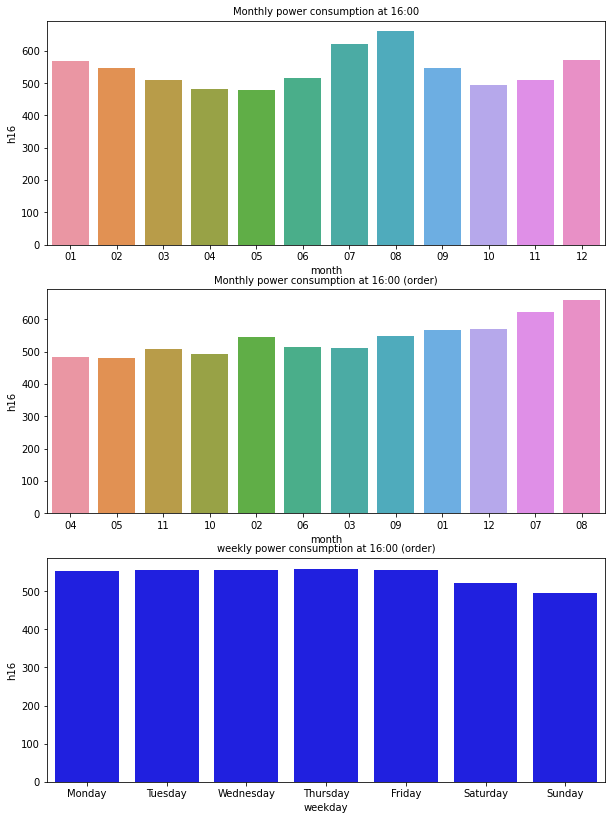

In [86]:
plt.figure(figsize=(10, 14))
## 월에 따른 그래프
ax1=plt.subplot(3, 1, 1)
ax1.set(title='Monthly power consumption at 16:00');
sns.barplot(x="month", y="h16", data=df, 
            label="total", ci=None)
#순서대로
ax2=plt.subplot(3, 1, 2)
ax2.set(title='Monthly power consumption at 16:00 (order)');

order_list = df.groupby(["month"])['h16'].sum().sort_values().index
sns.barplot(x="month", y="h16", data=df, 
            label="total", ci=None, order=order_list)


ax3=plt.subplot(3, 1, 3)
ax3.set(title='weekly power consumption at 16:00 (order)');

sns.barplot(x="weekday", y="h16", data=df, 
            label="total", color="b", ci=None)
plt.show()